# 0 - Load modules

In [1]:
import sys
import xarray as xr
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import glob
from netCDF4 import Dataset
import cartopy.crs as ccrs
import json
import os
import matplotlib.gridspec as gridspec
import matplotlib.image as mpimg

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline



/scratch/cnt0024/hmg2840/albert7a/anaconda3/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [2]:
def save_mean_profiles(reg,config,case):
    namezone='NATL60-CJM165_'+reg+'_y2012-2013'
    jsonfile='/scratch/cnt0024/hmg2840/albert7a/EN4/profiles_files/NATL60-CJM165_'+reg+'_y2012-2013/NATL60-CJM165_'+reg+'_y2012-2013_final.json'
    dirn='/scratch/cnt0024/hmg2840/albert7a/EN4/profiles_files/NATL60-CJM165_'+reg+'_y2012-2013/'+config+'-'+case+'/'    
    
    #averaging the data in boxes

    vert_standart=[0,2,4,6,8,10,12,14,16,18,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,110,120,130,140,150,160,170,180,190,200,220,240,260,280,300,320,340,360,380,400,420,440,460,480,500,520,540,560,580,600,620,640,660,680,700,720,740,760,780,800,820,840,860,880,900,920,940,960,980,1000,1050,1100,1150,1200,1250,1300,1350,1400,1450,1500,1550,1600,1650,1700,1750,1800,1850,1900,1950,2000]

    def get_netcdf_profiles(netcdf_name):

        dsprof=xr.open_dataset(netcdf_name)
        depth=dsprof['depth_en4']
        temp_en4=dsprof['temp_profileEN4']
        salt_en4=dsprof['salt_profileEN4']
        mean_temp_model=dsprof['mean_temp_model']
        mean_salt_model=dsprof['mean_salt_model']
        percent10_temp_model=dsprof['percent10_temp_model']
        percent10_salt_model=dsprof['percent10_salt_model']
        percent90_temp_model=dsprof['percent90_temp_model']
        percent90_salt_model=dsprof['percent90_salt_model']

        return depth,temp_en4,salt_en4,mean_temp_model,mean_salt_model,percent10_temp_model,percent10_salt_model,percent90_temp_model,percent90_salt_model


    sourcefile=open(jsonfile,'rU')
    infos=json.load(sourcefile)
    nb_profilesEN4=len(infos)

    print(str(nb_profilesEN4)+' profils a la base ...')
    nb=0


    all_temp_mean_model=np.zeros((nb_profilesEN4,len(vert_standart)))
    all_salt_mean_model=np.zeros((nb_profilesEN4,len(vert_standart)))
    all_temp_en4=np.zeros((nb_profilesEN4,len(vert_standart)))
    all_salt_en4=np.zeros((nb_profilesEN4,len(vert_standart)))
    all_temp_percent10_model=np.zeros((nb_profilesEN4,len(vert_standart)))
    all_salt_percent10_model=np.zeros((nb_profilesEN4,len(vert_standart)))
    all_temp_percent90_model=np.zeros((nb_profilesEN4,len(vert_standart)))
    all_salt_percent90_model=np.zeros((nb_profilesEN4,len(vert_standart)))

    for prof in np.arange(nb_profilesEN4):
        list_profiles = infos.keys()
        reference = str(list(list_profiles)[prof])
        reference_profile=reference[-16:-1]
        outname=dirn+"/profiles_EN4-"+reference_profile+"_"+config+"-"+case+"_TS_vert-stand.nc"

        if os.path.exists(outname):
            depth,temp_en4,salt_en4,mean_temp_model,mean_salt_model,percent10_temp_model,percent10_salt_model,percent90_temp_model,percent90_salt_model = get_netcdf_profiles(outname)
            ien4t=np.where(np.isnan(temp_en4)==True)
            ien4s=np.where(np.isnan(salt_en4)==True)
            imodt=np.where(np.isnan(mean_temp_model)==True)
            imods=np.where(np.isnan(mean_salt_model)==True)
            if len(imodt[:][0])>0:
                dep_modt=depth[np.min(imodt[:][0])].values
            else:
                dep_modt=2000
            if len(imods[:][0])>0:
                dep_mods=depth[np.min(imods[:][0])].values
            else:
                dep_mods=2000
            if len(ien4t[:][0]) >0: 
                dept=depth[np.min(ien4t[:][0])].values
            else:
                dept=2000
            
            if len(ien4s[:][0]) >0:
                deps=depth[np.min(ien4s[:][0])].values
            else:
                deps=2000
                
            if dept>1000 and deps>1000:
                if dept == 2000:
                    ecart=110
                else:
                    ecart=10
                if np.abs(dept-dep_modt)<ecart and np.abs(deps-dep_mods)<ecart:
                    nb=nb+1
                    all_temp_mean_model[prof,:]=mean_temp_model[:]
                    all_salt_mean_model[prof,:]=mean_salt_model[:]
                    all_temp_en4[prof,:]=temp_en4[:]
                    all_salt_en4[prof,:]=salt_en4[:]
                    all_temp_percent10_model[prof,:]=percent10_temp_model[:]
                    all_salt_percent10_model[prof,:]=percent10_salt_model[:]
                    all_temp_percent90_model[prof,:]=percent90_temp_model[:]
                    all_salt_percent90_model[prof,:]=percent90_salt_model[:]

    print(str(nb)+' profils finalement ..')

    all_temp_mean_model[all_temp_mean_model==0.]='nan'
    all_salt_mean_model[all_salt_mean_model==0.]='nan'
    all_temp_en4[all_temp_en4==0.]='nan'
    all_salt_en4[all_salt_en4==0.]='nan'
    all_temp_percent10_model[all_temp_percent10_model==0.]='nan'
    all_salt_percent10_model[all_salt_percent10_model==0.]='nan'
    all_temp_percent90_model[all_temp_percent90_model==0.]='nan'
    all_salt_percent90_model[all_salt_percent90_model==0.]='nan'

    all_salt_en4[all_salt_en4<30.]='nan'


    # Mean Bias are computed
    mean_temp_en4=np.nanmean(all_temp_en4,0)
    mean_temp_mod=np.nanmean(all_temp_mean_model,0)
    mean_salt_en4=np.nanmean(all_salt_en4,0)
    mean_salt_mod=np.nanmean(all_salt_mean_model,0)
    temp_percent10=np.nanmean(all_temp_percent10_model,0)
    salt_percent10=np.nanmean(all_salt_percent10_model,0)
    temp_percent90=np.nanmean(all_temp_percent90_model,0)
    salt_percent90=np.nanmean(all_salt_percent90_model,0)
    
    np.savez(dirn+'Mean_profiles_over1000m', mean_temp_mod,mean_temp_en4,temp_percent10,temp_percent90,mean_salt_mod,mean_salt_en4,salt_percent10,salt_percent90)




In [ ]:
save_mean_profiles('GS','GS36','MPC001')


18173 profils a la base ...
900 profils finalement ..
18173 profils a la base ...


In [3]:
save_mean_profiles('GS','GS36','MPC002')


18173 profils a la base ...
1554 profils finalement ..


In [4]:
save_mean_profiles('GS','GS36','MPC003')


18173 profils a la base ...
2015 profils finalement ..


In [6]:
save_mean_profiles('EU','EU36','MPC001')
save_mean_profiles('EU','EU36','MPC002')


8903 profils a la base ...
509 profils finalement ..
8903 profils a la base ...
438 profils finalement ..


In [7]:
save_mean_profiles('EU','EU36','MPC003')


8903 profils a la base ...
739 profils finalement ..


In [3]:
def plot_profils_mean(reg,maxdep,mintemp,maxtemp,minsalt,maxsalt):
    
    vert_standart=[0,2,4,6,8,10,12,14,16,18,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,110,120,130,140,150,160,170,180,190,200,220,240,260,280,300,320,340,360,380,400,420,440,460,480,500,520,540,560,580,600,620,640,660,680,700,720,740,760,780,800,820,840,860,880,900,920,940,960,980,1000,1050,1100,1150,1200,1250,1300,1350,1400,1450,1500,1550,1600,1650,1700,1750,1800,1850,1900,1950,2000]
    dirn1='/scratch/cnt0024/hmg2840/albert7a/EN4/profiles_files/NATL60-CJM165_'+reg+'_y2012-2013/'+reg+'36-MPC001/'
    dirn2='/scratch/cnt0024/hmg2840/albert7a/EN4/profiles_files/NATL60-CJM165_'+reg+'_y2012-2013/'+reg+'36-MPC002/'
    dirn3='/scratch/cnt0024/hmg2840/albert7a/EN4/profiles_files/NATL60-CJM165_'+reg+'_y2012-2013/'+reg+'36-MPC003/'
    
    def read_var_npz(dirn,varin):
        varout = np.load(dirn+'Mean_profiles_over1000m.npz')[varin]
        return varout
        
    mean_temp_mod1=read_var_npz(dirn1,'arr_0')
    mean_temp_en41=read_var_npz(dirn1,'arr_1')
    temp_percent101=read_var_npz(dirn1,'arr_2')
    temp_percent901=read_var_npz(dirn1,'arr_3')
    mean_salt_mod1=read_var_npz(dirn1,'arr_4')
    mean_salt_en41=read_var_npz(dirn1,'arr_5')
    salt_percent101=read_var_npz(dirn1,'arr_6')
    salt_percent901=read_var_npz(dirn1,'arr_7')
    
    mean_temp_mod2=read_var_npz(dirn2,'arr_0')
    mean_temp_en42=read_var_npz(dirn2,'arr_1')
    temp_percent102=read_var_npz(dirn2,'arr_2')
    temp_percent902=read_var_npz(dirn2,'arr_3')
    mean_salt_mod2=read_var_npz(dirn2,'arr_4')
    mean_salt_en42=read_var_npz(dirn2,'arr_5')
    salt_percent102=read_var_npz(dirn2,'arr_6')
    salt_percent902=read_var_npz(dirn2,'arr_7')

    mean_temp_mod3=read_var_npz(dirn3,'arr_0')
    mean_temp_en43=read_var_npz(dirn3,'arr_1')
    temp_percent103=read_var_npz(dirn3,'arr_2')
    temp_percent903=read_var_npz(dirn3,'arr_3')
    mean_salt_mod3=read_var_npz(dirn3,'arr_4')
    mean_salt_en43=read_var_npz(dirn3,'arr_5')
    salt_percent103=read_var_npz(dirn3,'arr_6')
    salt_percent903=read_var_npz(dirn3,'arr_7')
    

    fig, axs = plt.subplots(1,2, figsize=(10, 10))
    axs = axs.ravel()
    title = 'Temperature and Salinity Profiles in '+reg+' region'
    plt.suptitle(title,size = 25,y=1.05)

    axs[0].plot(mean_temp_mod1,vert_standart,'r.-', label=reg+'36-75')
    axs[0].plot(mean_temp_mod2,vert_standart,'b.-', label=reg+'36-150surf')
    axs[0].plot(mean_temp_mod3,vert_standart,'g.-', label=reg+'36-150arctan')
    axs[0].plot(mean_temp_en41,vert_standart,'k.-', label='EN4 obs')
    axs[0].set_ylabel('Depth [m]', size=14)
    axs[0].set_ylabel('Temperature [degC]', size=14)
    axs[0].set_ylim(maxdep, 0)
    axs[0].set_xlim(mintemp, maxtemp)
    axs[0].grid(True, which='both')
    axs[0].xaxis.tick_top()
    axs[0].xaxis.set_label_position('top') 
    axs[0].plot(temp_percent101,vert_standart,'r:')
    axs[0].plot(temp_percent901,vert_standart,'r:')
#    axs[0].fill_betweenx(vert_standart, temp_percent101, x2=temp_percent901, alpha=0.2, facecolor='r')
    axs[0].plot(temp_percent102,vert_standart,'b:')
    axs[0].plot(temp_percent902,vert_standart,'b:')
#    axs[0].fill_betweenx(vert_standart, temp_percent102, x2=temp_percent902, alpha=0.2, facecolor='b')
    axs[0].plot(temp_percent103,vert_standart,'g:')
    axs[0].plot(temp_percent903,vert_standart,'g:')
#    axs[0].fill_betweenx(vert_standart, temp_percent103, x2=temp_percent903, alpha=0.2, facecolor='g')

    axs[1].plot(mean_salt_mod1,vert_standart,'r.-', label=reg+'36-75')
    axs[1].plot(mean_salt_mod2,vert_standart,'b.-', label=reg+'36-150surf')
    axs[1].plot(mean_salt_mod3,vert_standart,'g.-', label=reg+'36-150arctan')
    axs[1].plot(mean_salt_en41,vert_standart,'k.-', label='EN4 obs')
    axs[1].set_ylabel('Depth [m]', size=14)
    axs[1].set_ylabel('Salinity [PSU]', size=14)
    axs[1].set_ylim(maxdep, 0)
    axs[1].set_xlim(minsalt, maxsalt)
    axs[1].grid(True, which='both')
    axs[1].xaxis.tick_top()
    axs[1].xaxis.set_label_position('top') 
    axs[1].plot(salt_percent101,vert_standart,'r:')
    axs[1].plot(salt_percent901,vert_standart,'r:')
#    axs[1].fill_betweenx(vert_standart, salt_percent101, x2=salt_percent901, alpha=0.2, facecolor='r')
    axs[1].plot(salt_percent102,vert_standart,'b:')
    axs[1].plot(salt_percent902,vert_standart,'b:')
#    axs[1].fill_betweenx(vert_standart, salt_percent102, x2=salt_percent902, alpha=0.2, facecolor='b')
    axs[1].plot(salt_percent103,vert_standart,'g:')
    axs[1].plot(salt_percent903,vert_standart,'g:')
#    axs[1].fill_betweenx(vert_standart, salt_percent103, x2=salt_percent903, alpha=0.2, facecolor='g')

    plt.legend()
    fig.tight_layout()
    plt.savefig('Plots/Mean-Profiles-'+reg+'36_over1000m.png')


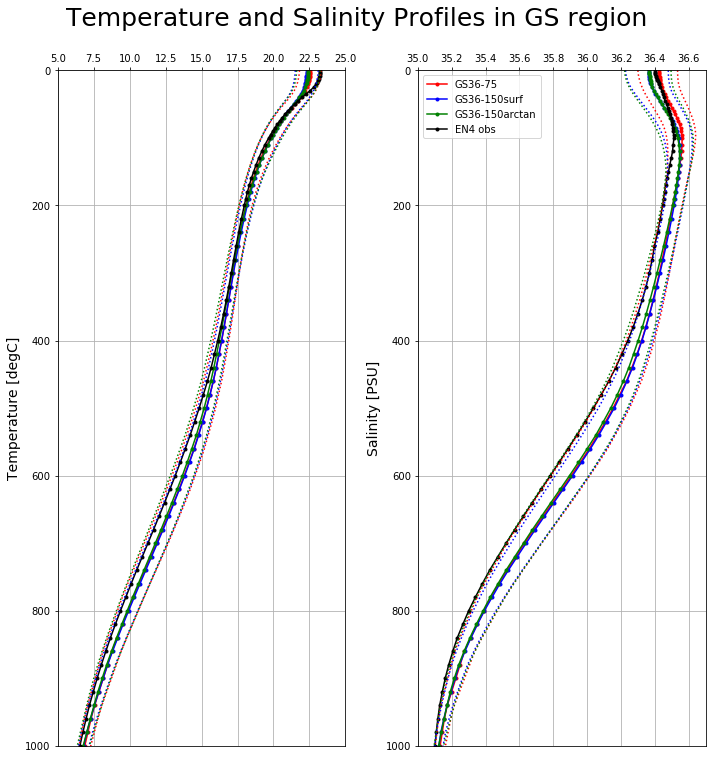

In [4]:
plot_profils_mean('GS',1000,5,25,35,36.7)

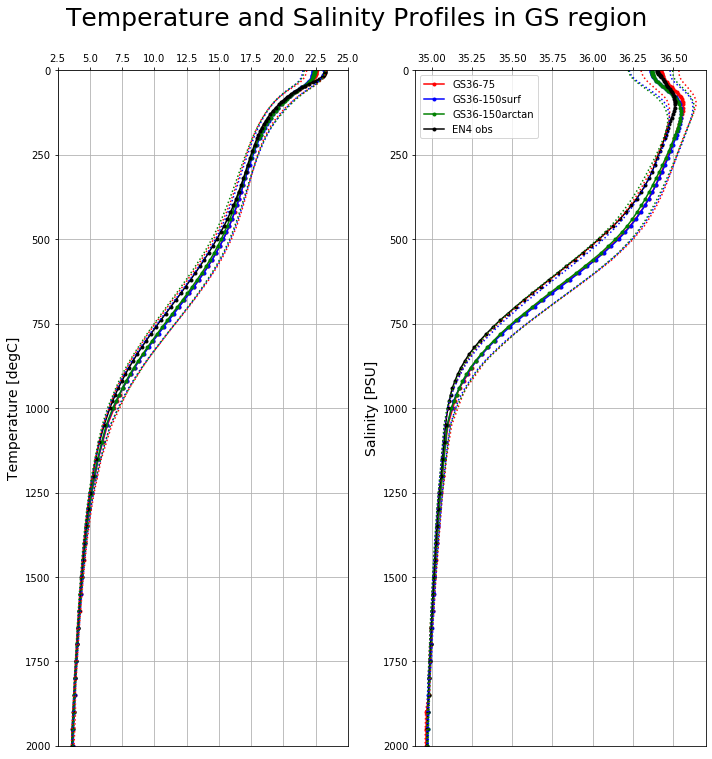

In [5]:
plot_profils_mean('GS',2000,2.5,25,34.9,36.7)

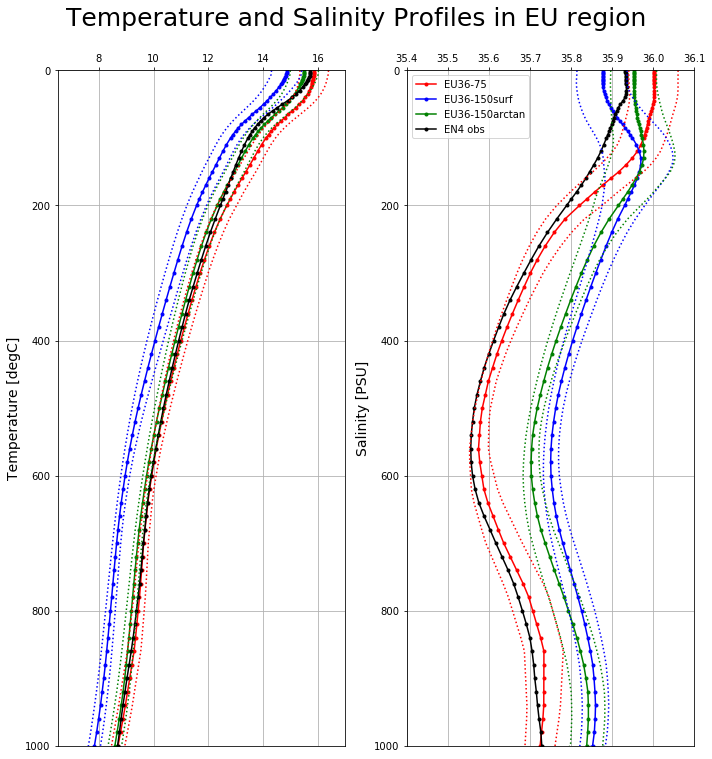

In [8]:
plot_profils_mean('EU',1000,6.5,17,35.4,36.1)

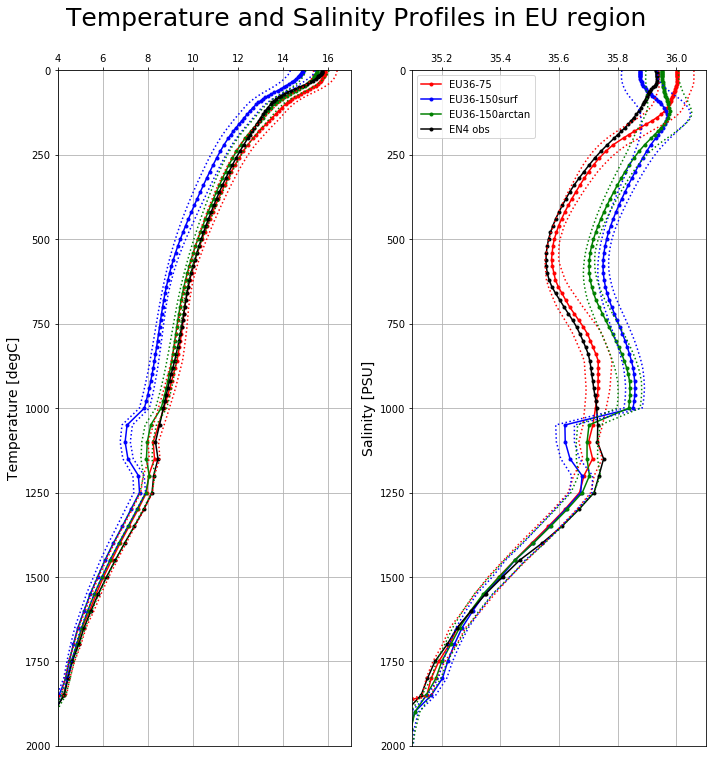

In [9]:
plot_profils_mean('EU',2000,4,17,35.1,36.1)